In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
 
import random
 

from sklearn.preprocessing import StandardScaler


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model



from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

from tabulate import tabulate 

import tensorflow as tf
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from tensorflow.keras.utils import plot_model

# Define custom metrics
recall = Recall()
precision = Precision()
f1_score = F1Score()
auc = AUC()






In [2]:
dataSetIndex = 4
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))



finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ]  

X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))

dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_with_AttentionLayers_" + dataSetName)
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += "_{}".format(fileData.shape)



Shape of fileData: (37079, 51)
Column Headings: Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079

Number of Missing Values: 0
Number o

Target Column Name: CoronaryHeartDisease


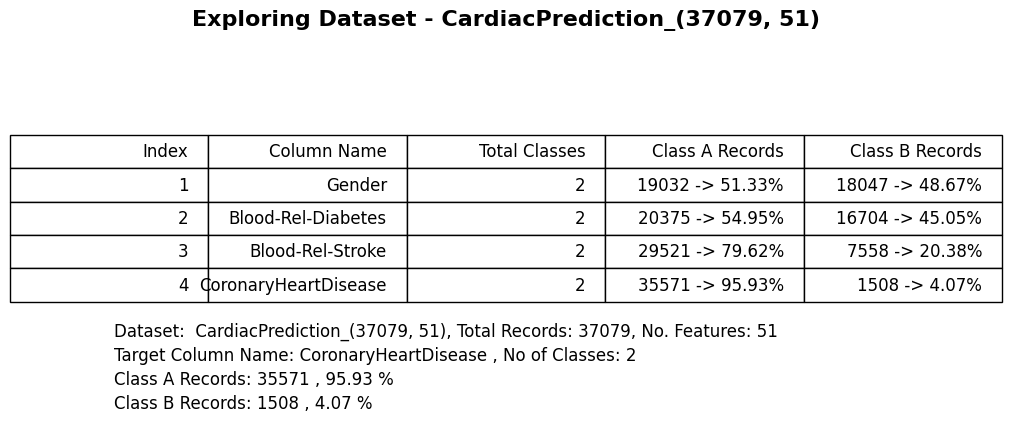

In [3]:
columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []
for column in columns:
    singleColumnCount = fileData[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 

tableDataRow = [
    ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'],
    
]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = fileData[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

# Create the figure and axes
fig, ax = mplot.subplots() 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 
print("Target Column Name: {}".format(columns[-1]))


dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, fileData.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(fileData[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[0], (np.array(fileData[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[1], (np.array(fileData[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.25,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.20,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, 0.15,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, 0.10,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   
 
 
mplot.axis('off')
mplot.title(f'Exploring Dataset - {dataSetName}' ,fontsize=16, fontweight='bold') 

picturePath = "{}1.DataSet_analysis_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig('DataSet_analysis.png', dpi=300)
mplot.show()
mplot.close()
 

In [4]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
 

print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))


rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

'''
# Undersample the majority class
X_train, y_train = rus.fit_resample(X_train, y_train)
X_test, y_test = rus.fit_resample(X_test, y_test)
'''

# Oversample the minority class using SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)
#X_test, y_test = rus.fit_resample(X_test, y_test)
X_test, y_test = smote.fit_resample(X_test, y_test) 


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))  
 
 
positiveClass =  0
negativeClass = 0
for i in y_train:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Train DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Train DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Train DataSet Total Records:: {}".format(positiveClass + negativeClass)) 

print("\n\n") 


positiveClass =  0
negativeClass = 0
for i in y_test:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Test DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Test DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Test DataSet Total Records:: {}".format(positiveClass + negativeClass)) 



Shape of fileData: (37079, 51) , target Len:37079
X: (37079, 50) , Y:(37079,)
Target Column Name:: CoronaryHeartDisease 



c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



 X Train: Shape:: (56914, 50)
 X Test: Shape:: (14228, 50)
Train DataSet Positive Class Records:: 28457
Train DataSet Negative Class Records:: 28457
Train DataSet Total Records:: 56914



Test DataSet Positive Class Records:: 7114
Test DataSet Negative Class Records:: 7114
Test DataSet Total Records:: 14228


In [5]:
def makeCorrelationPic(correlationMatrix, numberOfTopFeatures, targetColumnName):     
    correlation_values = correlationMatrix.abs()
    sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
    sorted_correlation = sorted_correlation[sorted_correlation != 1.0]

    num_features = numberOfTopFeatures  # Number of top features to display
    top_features = sorted_correlation.head(num_features)
    print("Top", num_features, "features based on correlation:")
    print(top_features)
 
    top_features = correlationMatrix.abs().nlargest(numberOfTopFeatures, targetColumnName)[targetColumnName].index
    top_correlation_matrix = correlationMatrix.loc[top_features, top_features]

    mplot.figure(figsize=(10, 8))
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
    # Set the title of the plot
    mplot.title('Correlation Heatmap ({})'.format(dataSetName))
    
    picturePath = "Correlation_Matrix_DateSetName_{}.png".format(dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    mplot.show()
    mplot.close()

def makeConfusionMatrixPic(method, dataSet, classifierObj , X_test, y_test, predicted_Y):
    display = ConfusionMatrixDisplay.from_estimator(classifierObj, X_test, y_test, display_labels=['Healthy', "Heart Disease"], cmap=mplot.cm.Blues) #, normalize="true"
    display.ax_.set_title("Confusion Matrix ({} Model)".format(method))
    display.ax_.set_xlabel('\nPredicted Values')
    display.ax_.set_ylabel('Actual Values ')


    accuracyString ="Accuracy {}: {:.2f}".format(method, accuracy_score(y_test, predicted_Y)*100.0 ) 
    recallString =  'Recall {}: {:.2f}'.format(method, recall_score(y_test, predicted_Y) * 100.0)
    precisionString = 'Precision {}: {:.2f}'.format(method, precision_score(y_test, predicted_Y) * 100.0) 
    dataSetString = "Dataset: {}".format(dataSet)

    
    if(classifierObj.n_features_in_ > 10):
        featureListString = 'Total Features: {}'.format(classifierObj.n_features_in_) 
    else:
        featureListString = 'Features: {}'.format(classifierObj.feature_names_in_) 
    
    display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
    display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
    display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.17,  dataSetString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.28,  featureListString, horizontalalignment='left', wrap=False ) 
 
    picturePath = "{}Confusion_Matrix_{}_{}.png".format(dataSetResultDirectory, method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))
    #os.startfile(picturePath)
    mplot.show()
    mplot.close()


In [6]:
X_train_normalized = tf.keras.utils.normalize(X_train, axis=1)
X_test_normalized = tf.keras.utils.normalize(X_test, axis=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test) 
# Our vectorized labels

X_train_f32 = np.asarray(X_train).astype(np.float32)  #.astype('float32').reshape((-1,1))
X_test_f32 = np.asarray(X_test).astype(np.float32)

#y_train_scaler = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_scaler = np.asarray(y_test).astype('float32').reshape((-1,1))

 

# Separate features and target variable
features = X_train_scaler # data.iloc[:, :-1]
target = np.asarray(y_train).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']
 
 

print("X_train shape: {}   and dType: {}".format(X_train.shape, len(X_train.columns)))
print("X_train_scaler shape: {}   and dType: {}".format(X_train_scaler.shape, X_train_scaler.dtype))
print("X_test_scaler shape: {}   and dType: {}".format(X_test_scaler.shape, X_test_scaler.dtype)) 


print("y_train shape: {}   and dType: {}".format(y_train.shape, y_train.dtype))  
print("y_test_scaler shape: {}   and dType: {}".format(y_test_scaler.shape, y_test_scaler.dtype))  


print("features shape: {}   and dType: {}".format(features.shape, features.dtype))
print("target shape: {}   and dType: {}".format(target.shape, target.dtype)) 

X_train shape: (56914, 50)   and dType: 50
X_train_scaler shape: (56914, 50)   and dType: float64
X_test_scaler shape: (14228, 50)   and dType: float64
y_train shape: (56914,)   and dType: int64
y_test_scaler shape: (14228, 1)   and dType: float32
features shape: (56914, 50)   and dType: float64
target shape: (56914, 1)   and dType: float64


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 50)                   2550      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50)                   200       ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dense_1 (Dense)             (None, 25)                   1275      ['batch_normalization[0][0

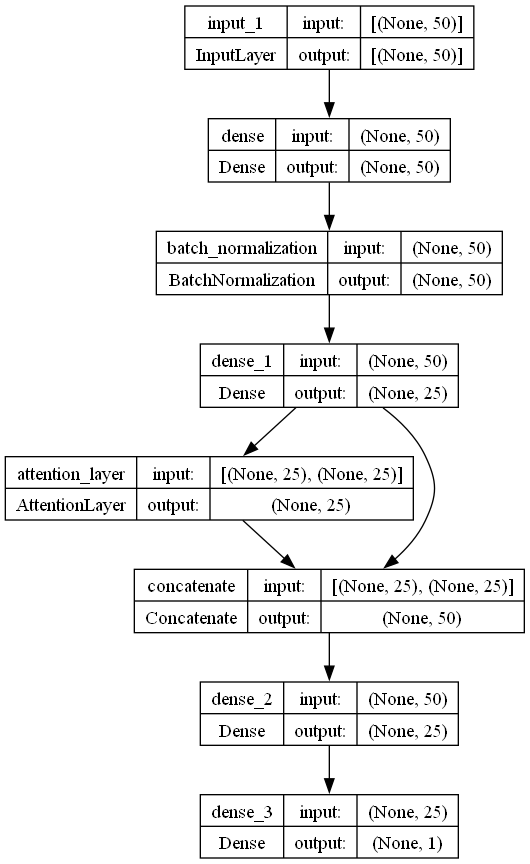

In [7]:
tf.keras.backend.clear_session()
# Define the attention layer
class AttentionLayer(tf.keras.layers.Layer):
    def call(self, inputs, **kwargs):
        q, v = inputs
        attention = tf.keras.layers.Attention()([q, v])
        return attention

# Build the model
input_layer = Input(shape=(features.shape[1],))
# Traditional neural network part
x = layers.Dense(features.shape[1], activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dense(features.shape[1]//2, activation='relu')(x)
# Attention layer
attention = AttentionLayer()([x, x])
# Combine the output of the attention layer with the previous layer
x = layers.Concatenate()([x, attention])
# Another dense layer
x = layers.Dense(features.shape[1]//2, activation='relu')(x)
# Output layer
output_layer = layers.Dense(1, activation='sigmoid')(x)
# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with AdamW optimizer
optimizer = AdamW(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', recall, precision, f1_score, auc])

# Display the model summary
#model.summary()


# Save the model architecture plot to a PNG file
picturePath = "{}Model_Architecture_{}.png".format(dataSetResultDirectory, dataSetName)
print(picturePath)

from tensorflow.keras.utils import plot_model
from IPython.display import Image
# Save the model architecture plot to a PNG file
plot_model(model, to_file=picturePath, show_shapes=True, show_layer_names=True)
Image(picturePath)


In [8]:
numberOfEpochs = 100
batchSizeOfTraining = 25
history = 0

# Train the model
with tf.device('/GPU:0'):
    history = model.fit(features, target, epochs=numberOfEpochs, batch_size=batchSizeOfTraining)



Epoch 1/100


2277/2277 [==============================] - 20s 7ms/step - loss: 0.2910 - accuracy: 0.8788 - recall: 0.9026 - precision: 0.8616 - f1_score: 0.6667 - auc: 0.9470
Epoch 2/100
2277/2277 [==============================] - 15s 7ms/step - loss: 0.2333 - accuracy: 0.9057 - recall: 0.9199 - precision: 0.8945 - f1_score: 0.6667 - auc: 0.9656
Epoch 3/100
2277/2277 [==============================] - 16s 7ms/step - loss: 0.2117 - accuracy: 0.9168 - recall: 0.9308 - precision: 0.9054 - f1_score: 0.6667 - auc: 0.9713
Epoch 4/100
2277/2277 [==============================] - 15s 6ms/step - loss: 0.1932 - accuracy: 0.9237 - recall: 0.9372 - precision: 0.9126 - f1_score: 0.6667 - auc: 0.9759
Epoch 5/100
2277/2277 [==============================] - 16s 7ms/step - loss: 0.1824 - accuracy: 0.9300 - recall: 0.9428 - precision: 0.9193 - f1_score: 0.6667 - auc: 0.9782
Epoch 6/100
2277/2277 [==============================] - 16s 7ms/step - loss: 0.1757 - accuracy: 0.9328 - recall: 0.9449 - preci

In [ ]:
from pptx_util import save_model_to_pptx
from matplotlib_util import save_model_to_file


picturePath = "{}Model_Architecture_.pptx".format(dataSetResultDirectory)
print(picturePath)
save_model_to_pptx(model, picturePath)
# save via matplotlib
save_model_to_file(model, picturePath)


In [ ]:
# Evaluate the model using the evaluate method
y_test_float64 = np.asarray(y_test).astype('float64').reshape((-1,1))  #data['CoronaryHeartDisease']

loss, accuracy, recall_value, precision_value, f1_score_value, auc_value = model.evaluate(X_test_scaler, y_test_float64)

# Print the results
print('Test loss: {}'.format(loss))
print('Test accuracy: {}'.format(accuracy))
print('Test recall: {}'.format(recall_value))
print('Test precision: {}'.format(precision_value))
print('Test F1 score: {}'.format(f1_score_value))
print('Test AUC: {}'.format(auc_value))



# Plotting the testing accuracy graph
plt.figure(figsize=(8, 6))
epochs = np.arange(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='Testing Accuracy', marker='o')
plt.title('Testing Accuracy Over Epochs MLP+AttentionLayer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, "Testing_Accuracy", dataSetName, numberOfEpochs)
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
 
plt.show()
plt.close()

In [ ]:
predictions = model.predict(X_test_scaler)
binary_predictions = predictions > 0.5 if 1 else 0
 
display = ConfusionMatrixDisplay.from_predictions(y_test, binary_predictions, display_labels=['Healthy', 'Heart Disease'], cmap=mplot.cm.Blues)


#display = ConfusionMatrixDisplay.from_estimator(model, X_test_scaler, y_test, display_labels=['Healthy', "Heart Disease"], cmap=mplot.cm.Blues) #, normalize="true"
method = "MLP with Attention layer"
display.ax_.set_title("Results {} Model".format(method))
display.ax_.set_xlabel('\nPredicted Values')
display.ax_.set_ylabel('Actual Values ')

accuracyString ="Accuracy {}: {:.2f}".format(method, accuracy*100.0 ) 
recallString =  'Recall {}: {:.2f}'.format(method, recall_value* 100.0)
precisionString = 'Precision {}: {:.2f}'.format(method, precision_value * 100.0) 
dataSetString = "F1 Score: {}".format(f1_score_value)
featureListString = "AUC Score: {}".format(auc_value)
numberOfEpochsString = "Number of Epoches: {}".format(numberOfEpochs)
batchSizeOfTrainingString = "BatchSize for Epoch: {}".format(batchSizeOfTraining)

display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.17,  dataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.21,  featureListString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.28,  numberOfEpochsString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.32,  batchSizeOfTrainingString, horizontalalignment='left', wrap=False ) 
 
picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))

mplot.show()
mplot.close()





In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
#plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('MLP+AttentionLayer Evaluation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

'''
# Add additional metrics and labels
#metrics = ['loss', 'recall', 'precision', 'f1_score', 'auc']
metrics = ['loss', 'accuracy', 'precision']
for metric in metrics:
    ax2 = plt.twinx()
    #plt.plot(history.history[metric], label=metric.capitalize(), ax=ax2)
    plt.plot(history.history[metric], label=metric.capitalize())
    ax2.set_ylabel(metric.capitalize(), labelpad=10)
    ax2.tick_params(axis='y', labelcolor='blue')
'''
# Adjust layout
plt.subplots_adjust(right=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save and clear plot
picturePath = "{}Model_Evaluation2_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, "MLP+AttentionLayer Model", dataSetName, numberOfEpochs)
plt.savefig(picturePath, dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
#plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('MLP+AttentionLayer Evaluation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Add additional metrics and adjust label positions
metrics = ['loss', 'recall', 'precision', 'f1_score', 'auc']
for i, metric in enumerate(metrics):
    plt.plot(history.history[metric], label=metric.capitalize())
    y_offset = (i - 2) * 0.1  # Adjust based on desired spacing
    plt.text(1, 1 - y_offset, metric.capitalize(), verticalalignment='top', ha='right', transform=plt.gca().transAxes)

# Adjust layout and legend
plt.subplots_adjust(right=0.75)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save and clear plot
picturePath = "{}Result_ModelEvaluation_{}_{}.png".format(dataSetResultDirectory, "MLP+AttentionLayer Model", dataSetName)
plt.savefig(picturePath, dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])

picturePath = "{}Confusion_Matrix_{}_{}.png".format(dataSetResultDirectory, "MLP+AttentionLayer Model", dataSetName)
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()



In [ ]:
import datetime
currentDateTime = datetime.datetime.now() 
currentDateTime = currentDateTime.strftime("%Y%m%d %H%M") 
modelPath = "{}model1_trained_{}_{}_{}percent.model".format(dataSetResultDirectory, dataSetName, currentDateTime, accuracy)
print(modelPath)
model.save(modelPath)